In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import seaborn as sns
%matplotlib inline

In [24]:
eastern_most_part = (44.815112, -66.950626) #West Quoddy Head, Maine --> HIGHEST LONG
western_most_part = (51.880000, -176.658056) #Adak, Alaska --> LOWEST LONG
northern_most_part = (71.387500, -156.481111) #Point Barrow, Alaska --> HIGHEST LAT
southern_most_part = (18.913611, -155.683333) #Ka Lae, Hawaii --> LOWEST LAT

In [25]:
US_trails = pd.read_csv('../data/US_trails_engineered.csv')

In [26]:
US_trails.columns

Index(['name', 'location', 'difficulty', 'length', 'ascent', 'descent',
       'stars', 'latitude', 'longitude', 'summary', 'url',
       'difficulty_encoded', 'category', 'type_Featured Ride', 'type_Trail',
       'city/town', 'state', 'length_range'],
      dtype='object')

In [27]:
US_trails.dtypes

name                   object
location               object
difficulty             object
length                float64
ascent                  int64
descent                 int64
stars                 float64
latitude              float64
longitude             float64
summary                object
url                    object
difficulty_encoded      int64
category               object
type_Featured Ride      int64
type_Trail              int64
city/town              object
state                  object
length_range           object
dtype: object

In [28]:
US_trails['latitude'].min()

19.707799999999999

In [29]:
US_trails['latitude'].max()

65.554599999999994

In [30]:
US_trails['longitude'].min()

-158.23759999999999

In [31]:
#this is the only measurement that's farther than the one we started with
US_trails['longitude'].max()

-68.229699999999994

In [32]:
#m = Basemap(projection = 'merc', llcrnrlat = 18.913611, urcrnrlat = 71.387500, llcrnrlon = -176.658056, urcrnrlon = -66.950626)
longitudes = US_trails['longitude'].tolist()
latitudes = US_trails['latitude'].tolist()

/Users/sarahlewis/ENTER/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/sarahlewis/ENTER/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/sarahlewis/ENTER/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/sarahlewis/ENTER/envs/py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


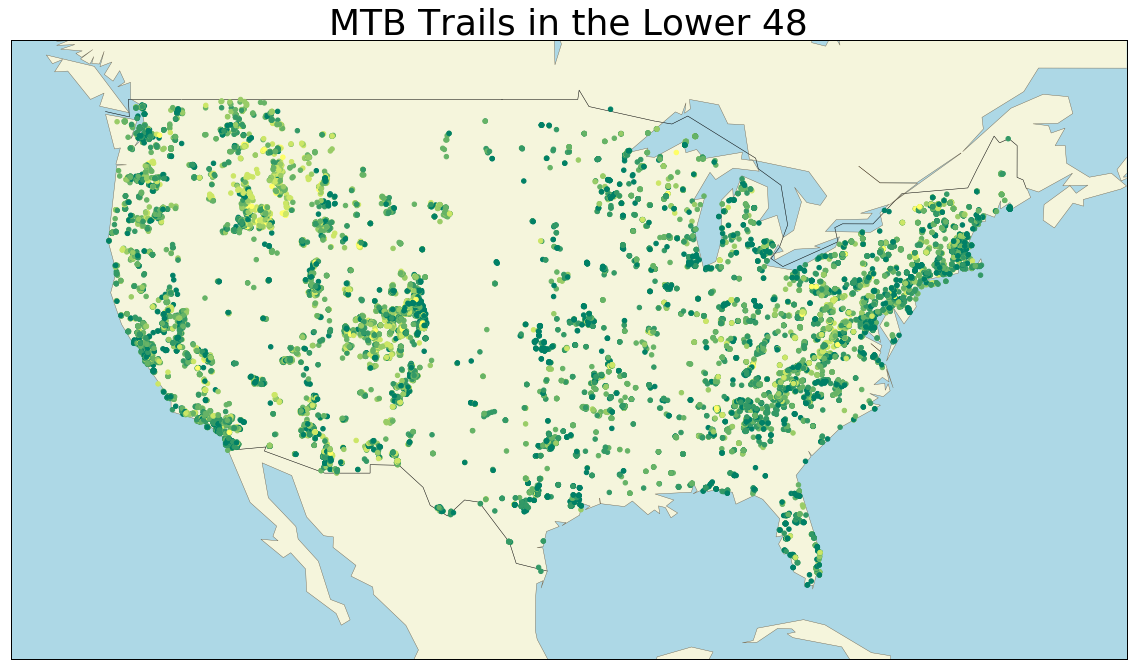

In [33]:
colors = ['green', 'blue green', 'blue', 'dark blue', 'almost black', 'black']
fig, ax = plt.subplots(figsize = (20,20))
m = Basemap(projection='merc',llcrnrlat=20.913611,urcrnrlat=51.387500,llcrnrlon=-130.658056,urcrnrlon=-60.950626,resolution='c')
#m = Basemap(projection='llc',llcrnrlat=18.913611,urcrnrlat=51.387500,llcrnrlon=-136.658056,urcrnrlon=-66.950626,resolution='i')
x,y = m(longitudes, latitudes)
m.fillcontinents(color='beige',lake_color='lightblue')
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.drawcoastlines(color='#6D5F47',linewidth=.4)
#m.scatter(x,y,s=20,zorder=2,c='darkblue')
m.scatter(x,y,s=20,zorder=2,c=US_trails['difficulty_encoded'],cmap='summer')
ax.set_title('MTB Trails in the Lower 48', fontsize=36)
plt.legend()
plt.savefig('../images/Trails_on_USmap.png', bbox_inches='tight')
plt.show()